# Chapter 2: Getting Started (Part B)
**Computer Vision with DSal**

by Ahmad Salehi

Learning how to apply logical operations (AND, OR, XOR, NOT) between image masks using OpenCV to extract or combine image regions, both in grayscale and color images. These techniques are used in image compositing, segmentation, and transparency masking.

In [38]:
## Importing libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [39]:
## Create basic shapes as masks

square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

- **Creates** a black 300x300 image and draws a white square (value 255) from (50,50) to (250,250).
- **-1** means the shape is filled.

Text(0.5, 1.0, 'Ellipse')

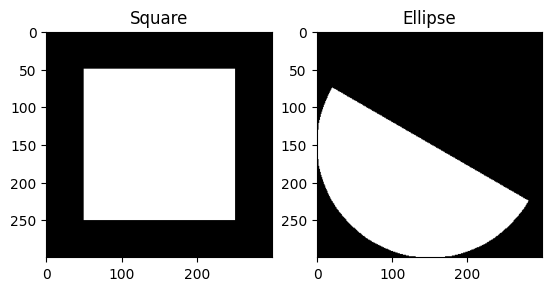

In [40]:
## Making an ellipse

ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)

#Showing the square
plt.subplot(121); plt.imshow(square, cmap='gray'); plt.title("Square")
plt.subplot(122); plt.imshow(ellipse, cmap='gray'); plt.title("Ellipse")        

- Creates a white half-ellipse inside a black canvas.

These are binary masks for bitwise operations.

**Bitwise Operations**

Operrations and descriptions:
- AND → Keeps only overlapping (white) areas between two shapes
- OR → Combines both shapes (any white pixel in either mask stays white)
- XOR → Keeps non-overlapping white areas
- NOT → Inverts the mask (white becomes black and vice versa)

In [41]:
bitwise_and = cv2.bitwise_and(square, ellipse)
bitwise_or = cv2.bitwise_or(square, ellipse)
bitwise_xor = cv2.bitwise_xor(square, ellipse)
bitwise_not = cv2.bitwise_not(square)
bitwise_not_sq = cv2.bitwise_not(square)

Text(0.5, 1.0, 'NOT Square')

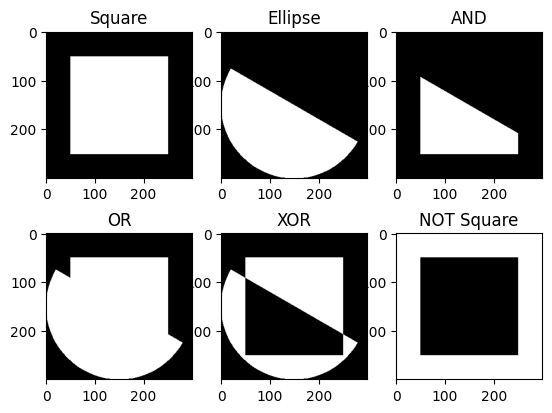

In [42]:
## Visualize Them

plt.subplot(231); plt.imshow(square, cmap='gray'); plt.title("Square")
plt.subplot(232); plt.imshow(ellipse, cmap='gray'); plt.title("Ellipse")        
plt.subplot(233); plt.imshow(bitwise_and, cmap='gray'); plt.title("AND")        
plt.subplot(234); plt.imshow(bitwise_or, cmap='gray'); plt.title("OR")        
plt.subplot(235); plt.imshow(bitwise_xor, cmap='gray'); plt.title("XOR")        
plt.subplot(236); plt.imshow(bitwise_not, cmap='gray'); plt.title("NOT Square")

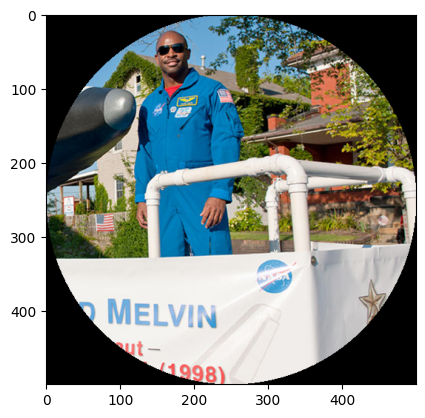

In [43]:
## Bitwise Operations on Colored Images

img = cv2.imread('image01.jpg')
cropped = img[0:500, 200:700]
circle = np.zeros(cropped.shape, np.uint8)
cv2.circle(circle, (250, 250), 250, (255, 255, 255), -1)
output_image = cv2.bitwise_and(cropped, circle)
plt.imshow(output_image[..., ::-1])

- A white-filled circle on a black canvas.
- bitwise_and keeps only parts of the cropped image that fall within the white circle.

In [44]:
## Adding Alpha Channel (PNG with Transparency)

png_image = np.zeros((500, 500, 4), np.uint8)
png_image[:, :, 0:3] = cropped #RGB
circle = np.zeros((500, 500), np.uint8)
cv2.circle(circle, (200, 200), 200, (255, 255, 255), -1)
png_image[:, :, 3] = circle
cv2.imwrite('Output.png', png_image)

True

- Adds an alpha channel to create a transparent PNG.
- White circle becomes fully visible, black is transparent.

In [45]:
## Mini Numeric Bitwise Example

square = np.zeros((10, 10), np.uint8)
cv2.rectangle(square, (2, 2), (8, 8), 2, -1)

circle1 = np.zeros((10, 10), np.uint8)
cv2.circle(circle1, (5, 5), 5, 3, -1)

circle2 = np.zeros((10, 10), np.uint8)
cv2.circle(circle2, (5, 5), 2, 4, -1)

output1 = cv2.bitwise_and(square, circle1)
output2 = cv2.bitwise_and(square, circle2)

print(square)
print(output1)
print(output2)
print(output1 | output2)
print(output1 & output2)
print(output1 ^ output2)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0

- This shows how bitwise logic happens pixel-by-pixel using binary logic.

Learning how to draw geometric shapes and annotations (like lines, rectangles, circles, ellipses, and polygons) using OpenCV functions on both color and grayscale images. These drawings help highlight objects, regions, or add overlays in image processing tasks.

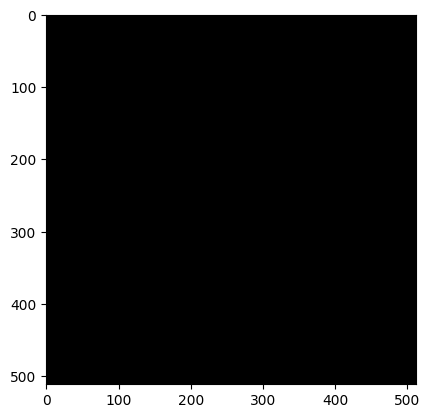

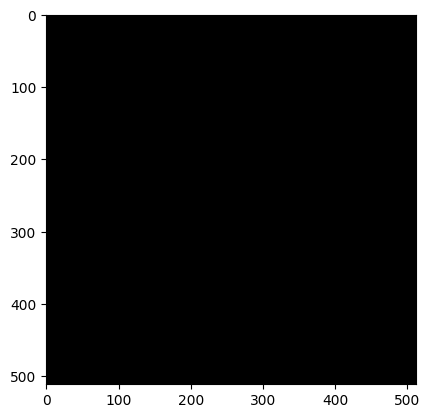

In [46]:
## Creating an Image Canvas

#creating a black image
image = np.zeros((512, 512, 3), np.uint8)

# creating a greyscale image
image_bw = np.zeros((512, 512), np.uint8)

plt.imshow(image[..., ::-1])
plt.figure()
plt.imshow(image_bw, cmap='gray')

- Creates a black image with 3 color channels (BGR).
- All pixel values are 0, hence black.
- uint8 is an 8-bit type, allowing pixel values from 0 to 255.

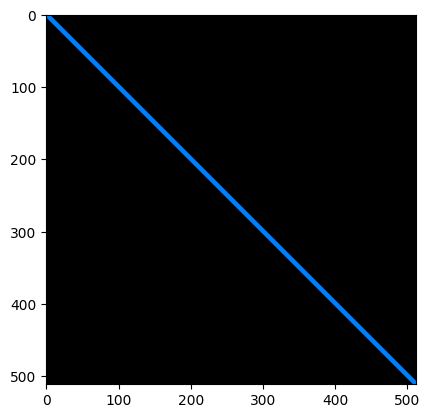

In [47]:
## Drawing a diogonal blue line of thickness of 5 pixels

cv2.line(image, (0, 0), (511, 511), (255, 127, 0), 5)
cv2.imshow('Blue line', image)
plt.imshow(image[..., ::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()

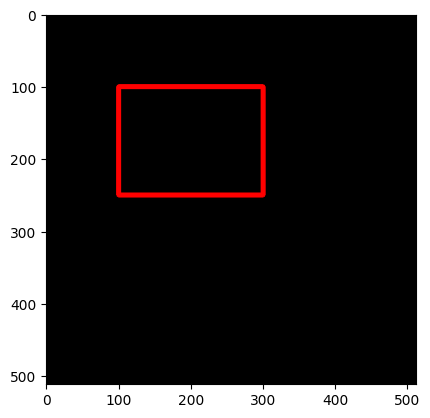

In [48]:
## Drawing a Rectangle

image = np.zeros((512, 512, 3), np.uint8)
cv2.rectangle(image, (100, 100), (300, 250), (0, 0, 255, 0), 5)
cv2.imshow('Rectangle', image)
plt.imshow(image[..., ::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()

You can also set thickness to -1 to fill the rectangle.

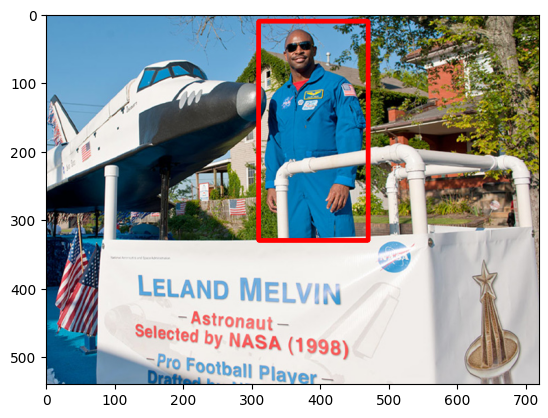

In [49]:
# Draw a Rectangle on a Real Image

img = cv2.imread('image01.jpg')
cv2.rectangle(img, (310, 10), (470, 330), (0, 0, 255, 0), 5)
plt.imshow(img[..., ::-1])

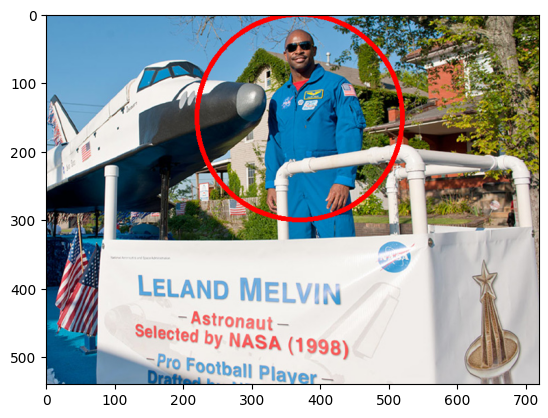

In [50]:
## Drawing a Circle

img = cv2.imread('image01.jpg')
cv2.circle(img, (370, 150), 150, (0, 0, 255, 0), 5)
plt.imshow(img[..., ::-1])

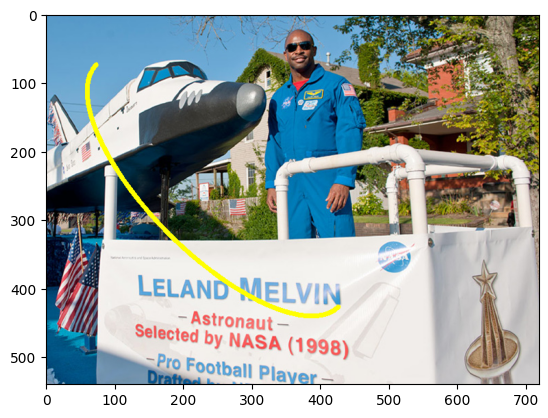

In [51]:
## Drawing an Ellipse

img = cv2.imread('image01.jpg')
cv2.ellipse(img, (250, 250), (250, 100), 45, 0, 180, (0, 255, 255, 0), 5)
plt.imshow(img[..., ::-1])

**Parmeters Explained**:

- (250, 250) → Center of Ellipse
- (250, 100) → Axes length: major (horizontal), minor (vertical)
- 45 → Rotation angle of the ellipse (in degrees)
- 0 → Start angle (portion of ellipse to draw, in degrees)
- 180 → End angle
- (0, 255, 255, 0) → Color (white)
- 5 → Filled ellipse

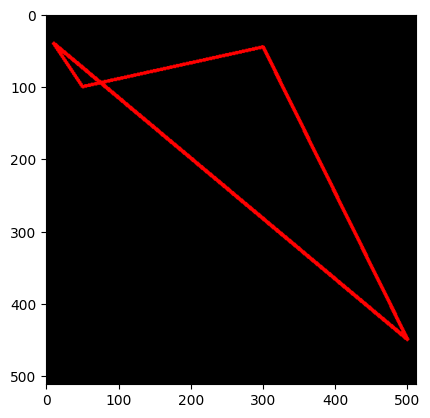

In [53]:
## Drawing Polylines (Custom Shapes)

image = np.zeros((512, 512, 3), np.uint8)
pts = np.array([[10, 40], [50, 100], [300, 45], [500, 450]], np.int32)
pts = pts.reshape((-1, 1, 2))

cv2.polylines(image, [pts], True, (0, 0, 255), 3)
cv2.imshow('Polylines', image)
plt.imshow(image[..., ::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()

Learning how to add customizable text to an image using OpenCV’s cv2.putText() function. This is useful for annotations, debugging, and creating visual output with captions or notes.

In [54]:
## Understanding cv2.putText()

image = np.zeros((512, 512, 3), np.uint8)
cv2.putText(image, 'Hello World!', (75, 250), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3)
cv2.imshow("Hello World!", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Parameters and description**:
cv2.putText(image, text, org, font, fontScale, color, thickness)
- image → Target image (Numpy array)
- 'Hello World!' → The string you want to display
- (75, 250) → Bottom-left corner of the text (x, y)
- cv2.FONT_HERSHEY_SIMPLEX → Font type (variety of options)
- 2 → Size of the font
- (0, 0, 255) → Color (Red)
- 3 → thickness

**Font options in OpenCV**
- FONT_HERSHEY_SIMPLEX → Basic sans-serif font
- FONT_HERSHEY_PLAIN → Small, thin font
- FONT_HERSHEY_COMPLEX → A bit fancier, serif font
- FONT_HERSHEY_TRIPLEX → Like complex, but thicker
- FONT_HERSHEY_SCRIPT_SIMPLEX → Handwritten-style
- FONT_HERSHEY_SCRIPT_COMPLEX → Fancier script font

**Arithmetic Operations**

In [55]:
import numpy as np

a = np.ones([2], dtype="uint8")
b = a * 100
print(a)
print(b + 155)
print(b + 156)

[1 1]
[255 255]
[0 0]



a = [1 1]
b = [255 255]
c = [0 0] → - uint8 only supports values from 0 to 255. The maximum possible value is 255 and -	Any result beyond 255 wraps around (modulo 256). This is called overflow.

**Solution: Avoid Overflow by Type Conversion**

Convert uint8 to a higher type like int16, do your operations, clamp to 255, and convert back:

In [56]:
## Solution 1

m1 = np.array([[200, 200], [156, 157]], dtype=np.uint8)
m2 = np.ones([2,2], dtype=np.uint8) * 100 # or you can simply write 100

modified_m1 = m1.astype('int16') + m2
modified_m1 = np.minimum(modified_m1, 255)
modified_m1 = modified_m1.astype('uint8')
print(modified_m1)

[[255 255]
 [255 255]]


In [57]:
## Solution 2

m1 = np.array([[200, 200], [156, 157]], dtype=np.uint8)
value_to_add = 100
max_threshold = 255 - 100

m1[m1 >= max_threshold] = 255
m1[m1 < max_threshold] += value_to_add

print(m1)

[[255 255]
 [255 255]]


But OpenCV offers a simple way. So, no need to use solution 1 and 2

Text(0.5, 1.0, 'Subtracted')

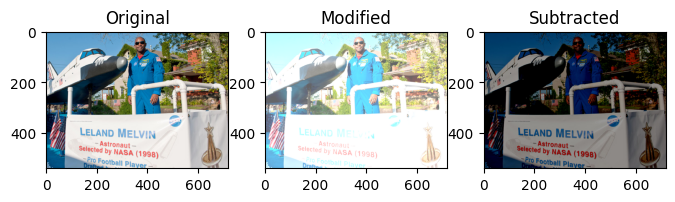

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image01.jpg')
M = np.ones(image.shape, dtype="uint8") * 100 # M is used for addition and subtraction
added = cv2.add(image, M)
subtracted = cv2.subtract(image, M)

plt.figure(figsize=(8, 8))
plt.subplot(131); plt.imshow(image[..., ::-1]); plt.title("Original")
plt.subplot(132); plt.imshow(added[..., ::-1]); plt.title("Modified")
plt.subplot(133); plt.imshow(subtracted[..., ::-1]); plt.title("Subtracted")

In subtraction and addition operations, pixel intensity values that fall below 0 are clipped to 0, and those exceeding 255 are clipped to 255.

In [60]:
img1 = cv2.imread('Map01.png')
img2 = cv2.imread('logo01.png')

print(img1.shape)
print(img2.shape)

(1080, 1920, 3)
(1080, 1920, 3)


In [61]:
logo_h, logo_w, _ = img2.shape
location_h = 10
location_w = 500
padded_img2 = np.zeros_like(img1)
padded_img2[location_h:location_h+logo_h, location_w:location_w+logo_w] = img2
plt.imshow(padded_img2[..., ::-1])

ValueError: could not broadcast input array from shape (1080,1920,3) into shape (1070,1420,3)

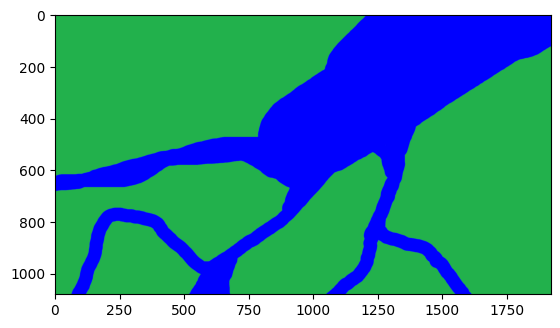

In [62]:
output_image = cv2.add(img1,padded_img2)
plt.imshow(output_image[...,::-1])

**Linear combination of weighted images**

cv2.addWeighted() is a function that perfoms a linear combination of two imges:

cv2.addWeighted(src1, alpha, src2, beta, gamma)

It's mathematically described by:

Image3(x,y) = (alpha)*Image1(x,y) + (Beta)*Image2(x,y) + Bias

Where:
- apha, beta, and Bias are scalars (weight)
- image1 and image 2 are input, and image3 is output

Text(0.5, 1.0, 'weighted sum')

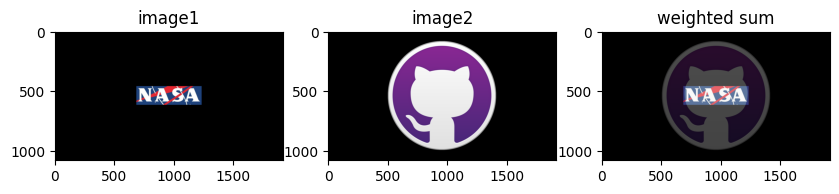

In [63]:
img1 = cv2.imread('NASA_Logo.png')
img2 = cv2.imread('logo01.png')

output_image = cv2.addWeighted(img2,0.3,img1,0.7,0) # img1 and img2 must have an equal size.

plt.figure(figsize=[10,5])
plt.subplot(131);plt.imshow(img1[...,::-1]);plt.title("image1")
plt.subplot(132);plt.imshow(img2[...,::-1]);plt.title("image2")
plt.subplot(133);plt.imshow(output_image[...,::-1]);plt.title("weighted sum")

# End of Part B 